# Mobile Like Dislike classification using Sigmoid Neuron

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sigmoid_neuron import sigmoidNeuron # importing sigmoid neuron class

# Load Data


In [2]:
data = pd.read_csv('./mobile_cleaned.csv')
data.head()

,PhoneId,Resolution,RAM,Screen to Body Ratio (calculated),Height,Capacity,Internal Memory,Pixel Density,Weight,Processor_frequency,Screen Size,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Sim1_2G,Sim1_3G,Sim1_4G,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,...,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Rating
0,0,20,4.0,80.68,157.9,4000,64,403,182,1.8,6.26,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4.5
1,1,8,3.0,80.85,156.2,4230,32,271,168,1.8,6.20,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4.5
2,2,25,3.0,83.68,157.0,3500,32,409,168,2.1,6.30,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4.4
3,4,24,4.0,74.78,159.8,3300,64,411,169,2.2,6.00,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,4.3
4,5,16,4.0,84.23,160.4,3750,64,396,175,2.2,6.50,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4.4


In [3]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating',axis = 1).values
Y = data['Rating'].values

In [0]:
threshold = 4.2
data['class'] = (data['Rating'] >= threshold).astype(np.int)
Y_binarised = data['class'].values

In [6]:
data['class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: class, dtype: float64

## Standardization

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state  = 1,stratify = Y_binarised)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [9]:
minmax = MinMaxScaler()
Y_scaled_train = minmax.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax.transform(Y_test.reshape(-1,1))
scaled_threshold = minmax.transform(np.array([threshold]).reshape(-1,1))[0][0]
Y_binarised_train = (Y_scaled_train > scaled_threshold ).astype(np.int).ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold ).astype(np.int).ravel()
print(scaled_threshold)

0.6800000000000002


# Train:

In [0]:
sn = sigmoidNeuron()

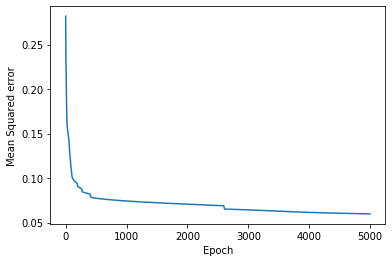

In [13]:
sn.fit(X_scaled_train,Y_binarised_train,5000,0.01,True,True)

In [12]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype(np.int).ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)

Y_pred_test = sn.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype(np.int).ravel()
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

print(accuracy_train,accuracy_test)

0.9372549019607843 0.8488372093023255
